# Using xtractomatic to extract data along a trackline

The `xtractomatic` package can be used to subset data from remote servers. There are routines to extract data from a `lon`, `lat`, `time` track (like a drifter or glider trajectory), a 3D bounding box, or within a polygon.

For this example let us use the built-in dataset for the tagged marlin in the Pacific Ocean (`Marlintag38606`).

In [1]:
library('xtractomatic')

str(Marlintag38606)

'data.frame':	152 obs. of  7 variables:
 $ date  : Date, format: "2003-04-23" "2003-04-24" ...
 $ lon   : num  204 204 204 204 204 ...
 $ lat   : num  19.7 19.8 20.4 20.3 20.3 ...
 $ lowLon: num  204 204 204 204 204 ...
 $ higLon: num  204 204 204 204 204 ...
 $ lowLat: num  19.7 18.8 18.8 18.9 18.9 ...
 $ higLat: num  19.7 20.9 21.9 21.7 21.7 ...


This is a "track-like" dataset with `lon`, `lat`, `time` arrays.

In [2]:
tagData <- Marlintag38606
xpos <- tagData$lon
ypos <- tagData$lat
tpos <- tagData$date

Now we can extract, for example, SeaWiFS chlorophyll 8 day composite(`swchla8day`) data around the recored tags.

Note the that `xlen=0.2` and `ylen=0.2` is the bounding box for finding the data around the desired positions.

In [3]:
swchl <- xtracto(xpos, ypos, tpos, 'swchla8day', xlen=0.2, ylen=0.2)

In [4]:
str(swchl)

'data.frame':	152 obs. of  11 variables:
 $ mean             : num  0.073 NaN 0.074 0.0653 0.0403 ...
 $ stdev            : num  NA NA 0.00709 0.00768 0.02278 ...
 $ n                : int  1 0 16 4 7 9 4 3 0 6 ...
 $ satellite date   : chr  "2003-04-19T00:00:00Z" "2003-04-27T00:00:00Z" "2003-04-27T00:00:00Z" "2003-04-27T00:00:00Z" ...
 $ requested lon min: num  204 204 204 204 204 ...
 $ requested lon max: num  204 204 204 204 204 ...
 $ requested lat min: num  19.6 19.7 20.3 20.2 20.2 ...
 $ requested lat max: num  19.8 19.9 20.5 20.4 20.4 ...
 $ requested date   : num  12165 12166 12172 12173 12174 ...
 $ median           : num  0.073 NA 0.073 0.0645 0.031 ...
 $ mad              : num  0 NA 0.00297 0.00741 0.0089 ...


Now we can use the `maps` and `ggplot2` packages to plot the results.

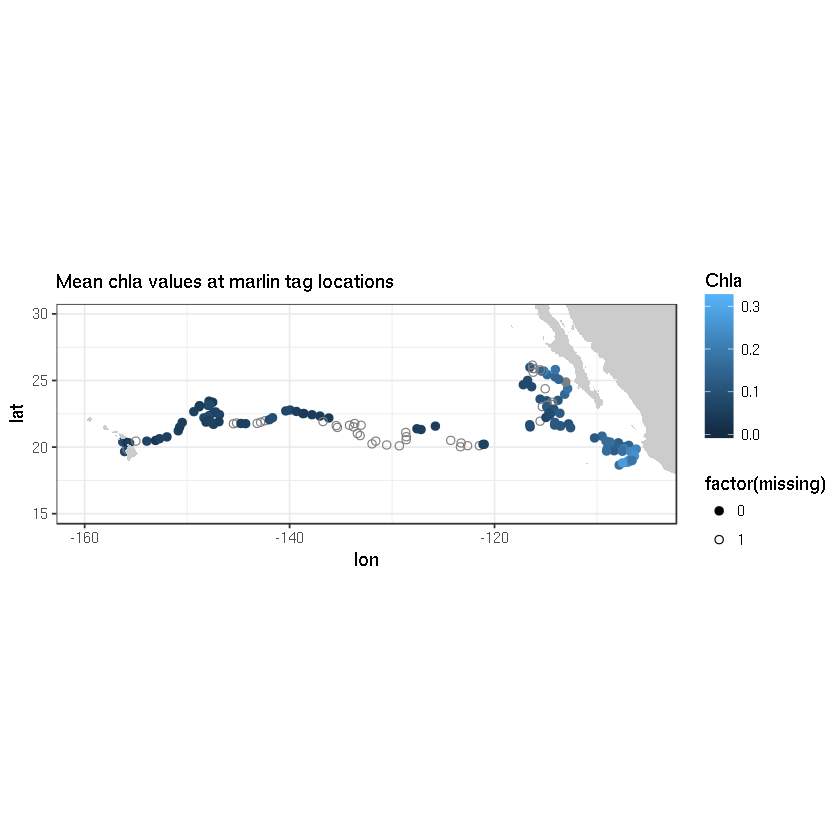

In [5]:
library('ggplot2')
library('maps')
library('mapdata')

# Combine the two data-frames.
alldata <- cbind(tagData, swchl)

# Adjust the longitudes to be (-180, 180).
alldata$lon <- alldata$lon - 360

# R does not have plotting support for NA so we need to a variable for it.
alldata$missing <- is.na(alldata$mean) * 1

# Map limits.
ylim <- c(15, 30)
xlim <- c(-160, -105)

# Get outline data for map.
w <- map_data('worldHires', ylim=ylim, xlim=xlim)

z <- ggplot(alldata, aes(x=lon, y=lat)) + 
   geom_point(aes(colour=mean,shape = factor(missing)), size = 2.) + 
   scale_shape_manual(values = c(19, 1))
z + geom_polygon(data = w, aes(x=long, y=lat, group=group), fill='grey80') + 
  theme_bw() + 
  scale_colour_gradient(limits = c(0.0, 0.32), 'Chla') + 
  coord_fixed(1.3, xlim=xlim, ylim=ylim) + ggtitle('Mean chla values at marlin tag locations')

We can do the same for topography data. Let's use the `ETOPO360` dataset to display the depth at the tag locations.

In [6]:
ylim <- c(15, 30)
xlim <- c(-160, -105)
topo <- xtracto(tagData$lon, tagData$lat, tagData$date, 'ETOPO360', 0.1, 0.1)

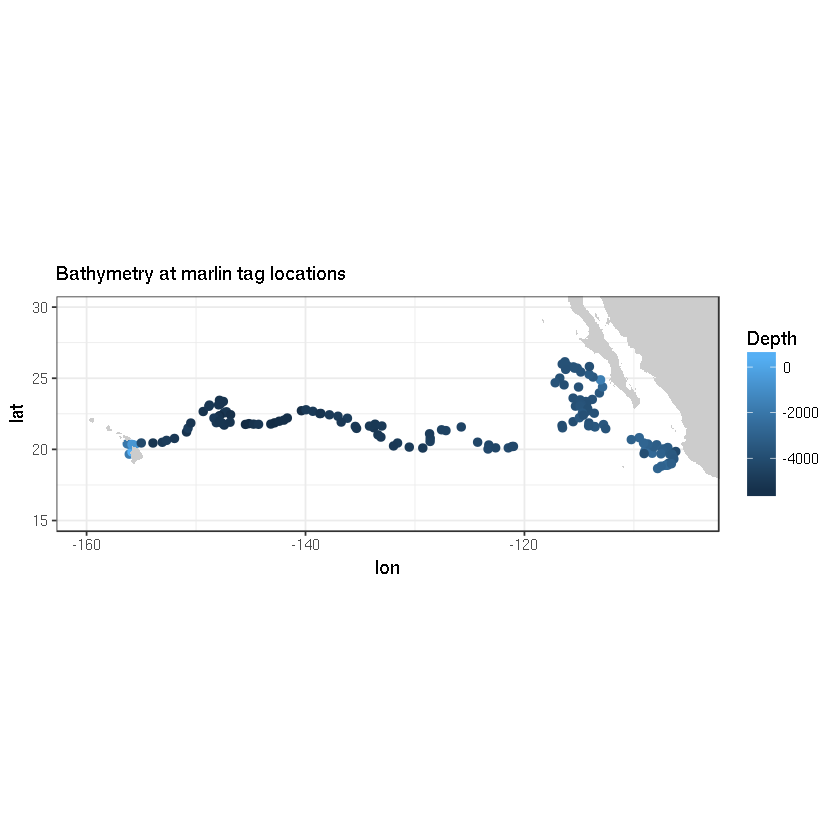

In [7]:
ylim <- c(15, 30)
xlim <- c(-160, -105)
alldata <- cbind(tagData, topo)
alldata$lon <- alldata$lon - 360
z <- ggplot(alldata, aes(x=lon, y=lat)) + 
   geom_point(aes(colour=mean), size=2.0) + 
  scale_shape_manual(values = c(19, 1))
z + geom_polygon(data = w, aes(x=long, y=lat, group=group), fill='grey80') + 
  theme_bw() + 
  scale_colour_gradient('Depth') + 
  coord_fixed(1.3, xlim=xlim, ylim=ylim) + ggtitle('Bathymetry at marlin tag locations')

For more information and example on the other routines see the full example from the documentation at [https://cran.r-project.org/web/packages/xtractomatic/vignettes/Usingxtractomatic.html](https://cran.r-project.org/web/packages/xtractomatic/vignettes/Usingxtractomatic.html)


PS: note that R and all the `xtractomatic` dependencies are already included in the [IOOS conda environment](http://ioos.github.io/notebooks_demos/other_resources/).